# Embryo LCB consensus peaks ostu filtering

cistopic_obj_filtered_otsu_embryo_all_LCB_embryo_consensusupeaks_13082024 is done with dev consensus peaks that include all samples (non dechor and dechor) and are not filtered =  /staging/leuven/stg_00002/lcb/hdickm/resources/consensus_peaks/dev_consensus_peaks/consensus_regions_LCB_embryo_atlas_v1_062024.bed

In [1]:
import pycisTopic
import os
import pickle
pycisTopic.__version__

'2.0a0'

In [2]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
out_dir = "/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/"
#os.makedirs(out_dir, exist_ok = True)

# make cistopic obj

use code in make_cistopic_obj_from_PUMATAC_otsu.py to make cistopic objs from PUMATAC output (all samples need to be processed together)

In [4]:
#import all cistopic obj and merge them into one

In [3]:
directory = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/cistopic_objs'

# List all .pkl files in the directory
pkl_files = [f for f in os.listdir(directory) if f.endswith('cto.pkl')]

# Load all .pkl files using pickle
cistopic_obj_list = []
for filename in pkl_files:
    filepath = os.path.join(directory, filename)
    with open(filepath, 'rb') as file:
        cistopic_obj = pickle.load(file)
        cistopic_obj_list.append(cistopic_obj)

In [4]:
from pycisTopic.cistopic_class import *

In [5]:
cistopic_obj = merge(cistopic_obj_list)

2024-09-05 11:42:01,544 cisTopic     INFO     cisTopic object 1 merged
2024-09-05 11:42:02,212 cisTopic     INFO     cisTopic object 2 merged
2024-09-05 11:42:04,594 cisTopic     INFO     cisTopic object 3 merged
2024-09-05 11:42:07,727 cisTopic     INFO     cisTopic object 4 merged
2024-09-05 11:42:11,044 cisTopic     INFO     cisTopic object 5 merged
2024-09-05 11:42:16,642 cisTopic     INFO     cisTopic object 6 merged
2024-09-05 11:42:24,102 cisTopic     INFO     cisTopic object 7 merged
2024-09-05 11:42:31,598 cisTopic     INFO     cisTopic object 8 merged
2024-09-05 11:42:40,449 cisTopic     INFO     cisTopic object 9 merged
2024-09-05 11:43:11,314 cisTopic     INFO     cisTopic object 10 merged
2024-09-05 11:43:20,489 cisTopic     INFO     cisTopic object 11 merged
2024-09-05 11:43:31,983 cisTopic     INFO     cisTopic object 12 merged
2024-09-05 11:43:44,401 cisTopic     INFO     cisTopic object 13 merged
2024-09-05 11:43:56,823 cisTopic     INFO     cisTopic object 14 merged
2

In [6]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 607330 × 95819


In [7]:
sample_counts = cistopic_obj.cell_data['sample_id'].value_counts().to_dict()
print(sample_counts)

{'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8': 66707, 'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1': 66113, 'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2': 64799, 'FDM__440342__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS7': 60394, 'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5': 47258, 'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6': 41826, 'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3': 27614, 'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4': 23796, 'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1': 23119, 'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6': 22849, 'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1': 18932, 'FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS2': 17895, 'FDM__15d2ea__240116_HyDropATAC_Dros_DGRP

In [9]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 607330 × 95819


In [9]:
cistopic_obj.cell_data

,cisTopic_log_nr_frag,cisTopic_nr_frag,cisTopic_log_nr_acc,cisTopic_nr_acc,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,Total_nr_frag_in_regions,Unique_nr_frag_in_regions,FRIP,TSS_enrichment,sample_id,kde__log_Unique_nr_frag_in_regions__TSS_enrichment,kde__log_Unique_nr_frag_in_regions__FRIP,kde__log_Unique_nr_frag_in_regions__Dupl_rate,barcode
CTCGATATCTGCTCGTTCATGATCTAGGTA___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,3.084219,1214,3.057286,1141,3.669131,3.229682,4668,1697,2971,0.636461,3499,1310,0.771951,5.267215,FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embry...,0.004043,0.163701,0.107235,CTCGATATCTGCTCGTTCATGATCTAGGTA
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,3.052309,1128,3.024075,1057,3.681060,3.237041,4798,1726,3072,0.640267,3375,1284,0.743917,2.659582,FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embry...,0.012742,0.299675,0.113522,CTACGCTGATCTGATTATGTTAATCGCACA
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,2.974972,944,2.959995,912,3.501059,3.199206,3170,1582,1588,0.500946,1968,1048,0.662453,2.262515,FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embry...,0.016210,0.277256,0.103929,GTTACCGCTCGGACCAAGTGTGGCTTAACA
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,3.611829,4091,3.545555,3512,4.152319,3.774590,14201,5951,8250,0.580945,11049,4677,0.785918,4.053339,FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embry...,0.003983,0.057739,0.016151,GAAGCCTAGTCCGTACCTATCCTGCCTATT
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,4.269746,18610,4.18523,15319,4.766866,4.478884,58461,30122,28339,0.484751,44913,23648,0.785074,3.210406,FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embry...,0.000377,0.003259,0.002205,AGCATGGAACTTCGCTATGTACCTGAGATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTGTGACAGTGCGGTGTAACTTGCTACA___FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4,2.593286,392,2.563481,366,3.161368,2.873321,1450,747,703,0.484828,974,505,0.676037,2.200000,FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embry...,0.039716,1.019904,0.269403,TGTTGTGACAGTGCGGTGTAACTTGCTACA
TCTTGGAATGCTGATTATGTGGACTATACT___FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4,2.741152,551,2.732394,540,3.111599,2.914872,1293,822,471,0.364269,756,517,0.628954,3.250499,FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embry...,0.019176,0.507473,0.210029,TCTTGGAATGCTGATTATGTGGACTATACT
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4,2.764176,581,2.744293,555,3.089552,2.879096,1229,757,472,0.384052,1016,625,0.825627,5.875986,FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embry...,0.002876,0.029508,0.193582,ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC
TCAACGTCACCACCGTTCTTTCGGAGTGAC___FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4,2.698101,499,2.68842,488,3.078819,2.877947,1199,755,444,0.370309,765,505,0.668874,3.438313,FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embry...,0.015459,0.940552,0.236376,TCAACGTCACCACCGTTCTTTCGGAGTGAC


In [12]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024.pkl"), "wb")
)

# topic modeling

In [5]:
import pickle
infile = open(out_dir + 'cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [6]:
model_folder = out_dir +"cistopic_objs/models/"
models = [
   pickle.load(open(os.path.join(model_folder, model_fname), "rb"))
   for model_fname in os.listdir(model_folder)]

2024-09-09 08:36:35,183	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


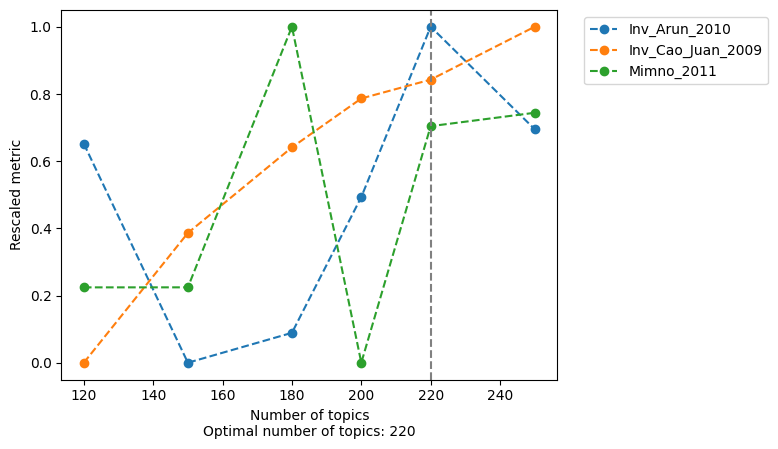

In [8]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
    metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011'],
    select_model = None,
    return_model = True
)

In [9]:
cistopic_obj.add_LDA_model(model)

In [10]:
find_clusters(
    cistopic_obj,
    target  = 'cell',
    k = 10,
    res = [0.6,1.2,1.6,2],
    prefix = 'pycisTopic_',
    scale = True,
    split_pattern = '-'
)

2024-09-09 08:36:59,545 cisTopic     INFO     Finding neighbours


In [11]:
run_umap(
    cistopic_obj,
    target  = 'cell', scale=True)

2024-09-09 08:48:41,572 cisTopic     INFO     Running UMAP


/opt/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
run_tsne(
    cistopic_obj,
    target  = 'cell', scale=True)

2024-09-09 08:57:54,763 cisTopic     INFO     Running TSNE


In [82]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024_220topics.pkl"), "wb")
)

### visualization

In [7]:
#after models - models are submitted
# Load cisTopic object
import pickle
infile = open(out_dir + 'cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024_220topics.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

FileNotFoundError: [Errno 2] No such file or directory: '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024_220topics.pkl'

In [8]:
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = out_dir + 'cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024_220topics.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    cistopic_obj = pickle.load(infile)

In [14]:
print(cistopic_obj.cell_data.columns)

Index(['cisTopic_log_nr_frag', 'cisTopic_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_nr_acc', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'kde__log_Unique_nr_frag_in_regions__FRIP',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'barcode',
       'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2',
       'pycisTopic_leiden_10_1.6', 'pycisTopic_leiden_10_2'],
      dtype='object')


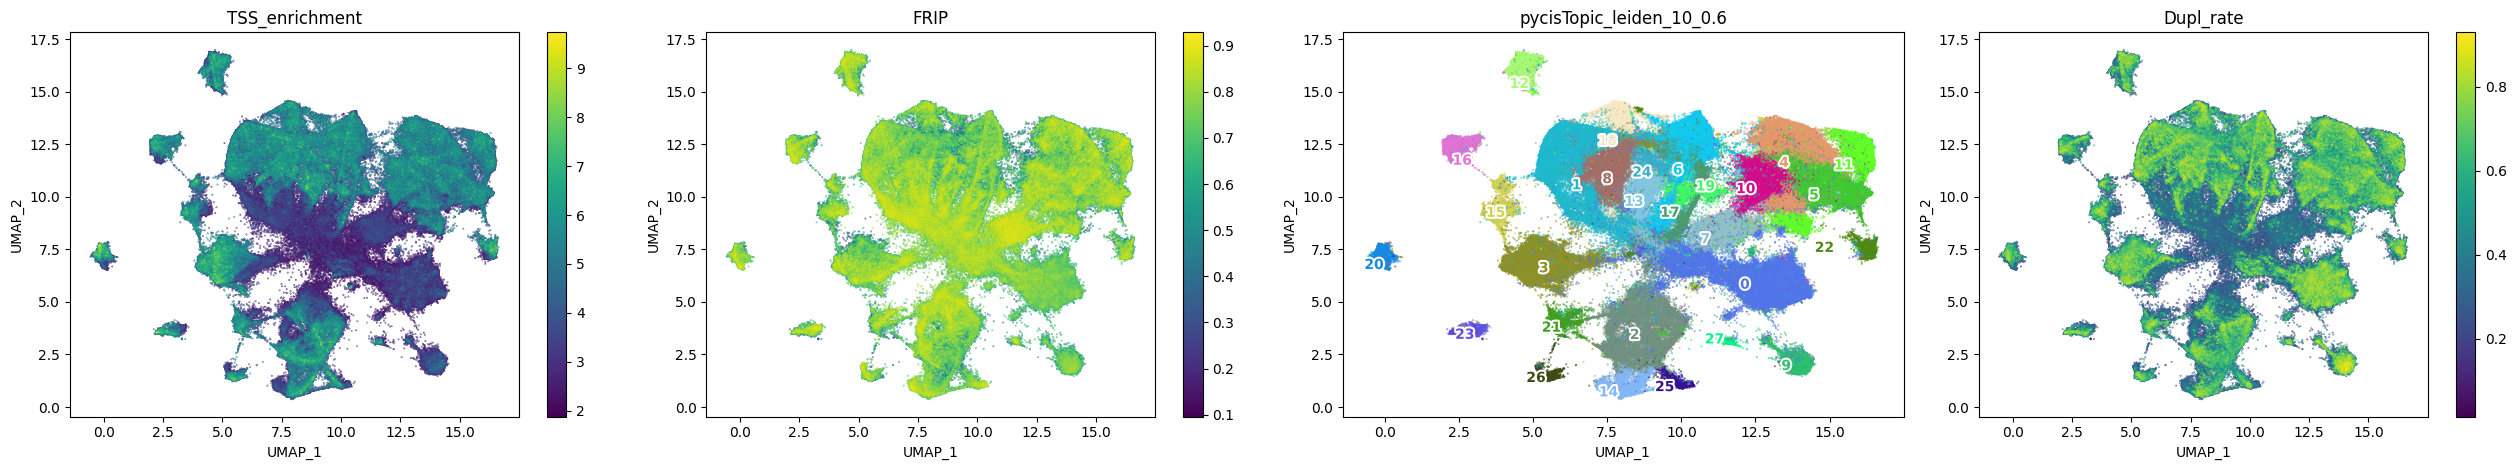

In [17]:
# model 220
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['TSS_enrichment', 'FRIP', 'pycisTopic_leiden_10_0.6', 'Dupl_rate'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=0.1)

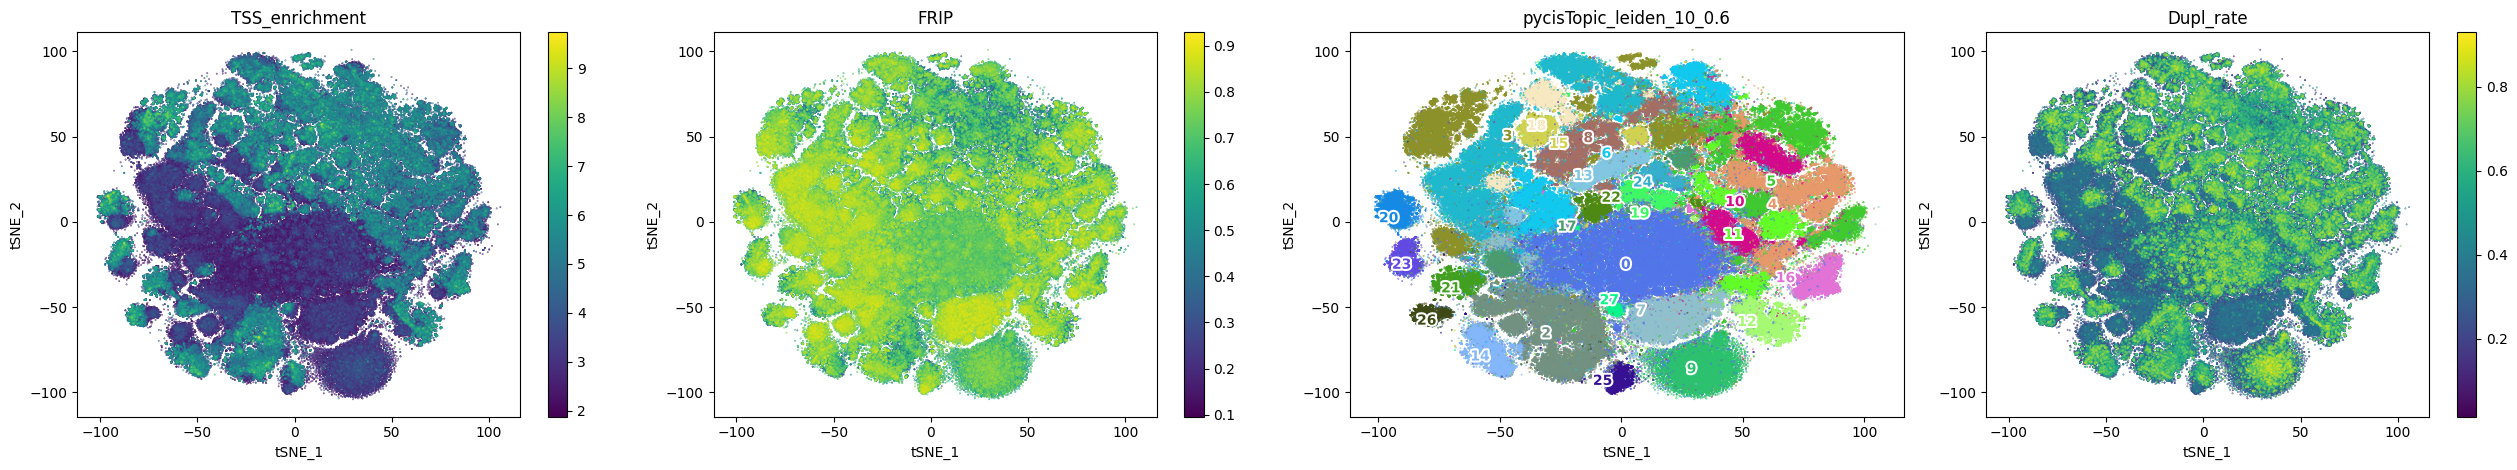

In [18]:
# model 220
plot_metadata(
    cistopic_obj,
    reduction_name='tSNE',
    variables=['TSS_enrichment', 'FRIP', 'pycisTopic_leiden_10_0.6', 'Dupl_rate'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=0.1)

# annotations

add your own annotations or use the ones from the preprocessed cistopic obj that is available in the supplementary material.

# DARs

In [76]:
from pycisTopic.diff_features import *
imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)

2024-09-09 14:38:20,223 cisTopic     INFO     Imputing region accessibility
2024-09-09 14:38:20,224 cisTopic     INFO     Impute region accessibility for regions 0-20000
2024-09-09 14:39:14,289 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2024-09-09 14:40:16,543 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2024-09-09 14:41:13,209 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2024-09-09 14:42:09,562 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2024-09-09 14:42:53,162 cisTopic     INFO     Done!


In [16]:
from pycisTopic.diff_features import *


In [17]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

2024-11-17 13:07:28,000 cisTopic     INFO     Normalizing imputed data
2024-11-17 13:11:15,723 cisTopic     INFO     Done!


2024-11-17 13:11:15,728 cisTopic     INFO     Calculating mean
2024-11-17 13:12:02,047 cisTopic     INFO     Calculating variance


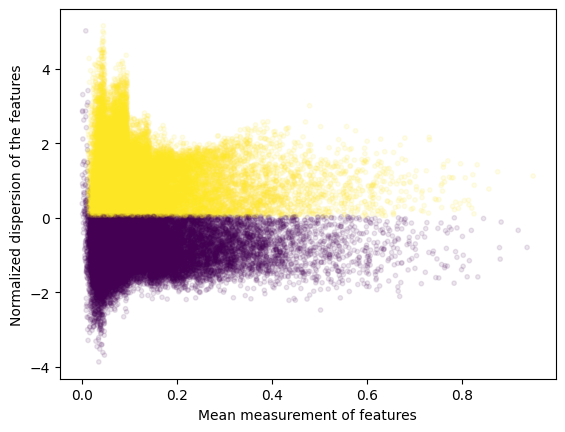

2024-11-17 13:16:30,489 cisTopic     INFO     Done!


In [18]:
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                           min_disp = 0.05,
                                           min_mean = 0.0125,
                                           max_mean = 3,
                                           max_disp = np.inf,
                                           n_bins=20,
                                           n_top_features=None,
                                           plot=True,
                                           #save= outDir + '10x_ATAC_16_20hAEL/DARs/HVR_plot.pdf'
                                                )

In [79]:
markers_dict= find_diff_features(cistopic_obj,
                      imputed_acc_obj,
                      variable='annotations_big_embryo_atlas_09092024',
                      var_features=variable_regions,
                      contrasts=None,
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=70)


2024-09-09 14:53:10,578	INFO worker.py:1724 -- Started a local Ray instance.


2024-09-09 14:53:12,079 cisTopic     INFO     Subsetting data for Digestive_system_midgut_alpha_betaTry_MalA1_A6 (22696 of 607330)
2024-09-09 14:53:22,755 cisTopic     INFO     Computing p-value for Digestive_system_midgut_alpha_betaTry_MalA1_A6
2024-09-09 14:55:17,369 cisTopic     INFO     Computing log2FC for Digestive_system_midgut_alpha_betaTry_MalA1_A6
2024-09-09 14:55:19,412 cisTopic     INFO     Digestive_system_midgut_alpha_betaTry_MalA1_A6 done!
2024-09-09 14:55:19,764 cisTopic     INFO     Subsetting data for Epithelial_cells_cuticle_Lcp2_3_Awh (51610 of 607330)
2024-09-09 14:55:26,093 cisTopic     INFO     Computing p-value for Epithelial_cells_cuticle_Lcp2_3_Awh
2024-09-09 14:57:05,963 cisTopic     INFO     Computing log2FC for Epithelial_cells_cuticle_Lcp2_3_Awh
2024-09-09 14:57:06,667 cisTopic     INFO     Epithelial_cells_cuticle_Lcp2_3_Awh done!
2024-09-09 14:57:07,220 cisTopic     INFO     Subsetting data for Fatbody (37666 of 607330)
2024-09-09 14:57:13,646 cisTopic  

In [80]:
with open(out_dir + 'DARs/Imputed_accessibility.pkl', 'wb') as f:
  pickle.dump(imputed_acc_obj, f)
with open(out_dir + 'DARs/DARs_annotations_big_embryo_atlas_09092024.pkl', 'wb') as f:
  pickle.dump(markers_dict, f)


## print DARs

In [4]:
import pickle
infile = open(out_dir+'DARs/DARs_annotations_big_embryo_atlas_09092024.pkl', 'rb')
markers_dict = pickle.load(infile)
infile.close()

In [11]:
out_dir

'/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/'

In [6]:
markers_dict.keys()

dict_keys(['Digestive_system_midgut_alpha_betaTry_MalA1_A6', 'Epithelial_cells_cuticle_Lcp2_3_Awh', 'Fatbody', 'Glia_main', 'Gut_neuropeptide_related_cells', 'Head_Ectoderm', 'Hindgut', 'Imaginal_disc_development_early_cell_fate_rn_zld_pan_positive', 'Malpighian_tubule', 'Midgut_ISC_primordial_cells_acidification', 'Midgut_zetta_kappa_lambda_iotaTry', 'NA_Epithelial_cells_cuticle_Lcp2_3_Awh', 'NA_Genital_endocrine_cells', 'NA_head_ectoderm_anlage_dev', 'NB_midline_cells_Genital_endocrine_cells', 'Neuronal_brain_visual_system_dev', 'PNS_sens_neurons', 'Pharnyx', 'Plasmatocytes', 'Primordium_all', 'Proventriculus_mesh', 'Salivary_gland', 'Somatic_muscle', 'Tracheal_system', 'VNC', 'Visceral_muscle', 'Yolk', 'muscle_attachement_Stripe_body_segementation', 'neuronal_NB_midline_cells_Genital_endocrine_cells', 'neuronal_ttk'])

Top 50 regions starting with '2R' for Fatbody:
2R:9041852-9042352
2R:18759730-18760230
2R:16823552-16824052
2R:18617834-18618334
2R:23502649-23503149
2R:11668869-11669369
2R:17756296-17756796
2R:19501152-19501652
2R:15220755-15221255
2R:6202390-6202890


Top 50 regions starting with '2R' for Glia_main:
2R:24839617-24840117
2R:18642892-18643392
2R:10132281-10132781
2R:11130126-11130626


Top 50 regions starting with '2R' for Hindgut:
2R:20898790-20899290
2R:20897403-20897903
2R:11534009-11534509
2R:20898258-20898758
2R:12406552-12407052
2R:11737294-11737794
2R:11520206-11520706
2R:11706146-11706646
2R:20885795-20886295
2R:17693050-17693550
2R:9158355-9158855
2R:15943480-15943980


Top 50 regions starting with '2R' for Malpighian_tubule:
2R:12663896-12664396
2R:22227095-22227595
2R:12301713-12302213
2R:6692269-6692769
2R:9177857-9178357
2R:14845434-14845934
2R:15304596-15305096
2R:14843130-14843630
2R:5957468-5957968
2R:12369385-12369885
2R:15304067-15304567


Top 50 regions starting wit

In [10]:
# Assuming markers_dict is a dictionary of dataframes, each containing a Log2FC column
keys_of_interest = ['Fatbody', 'Glia_main', 'Hindgut', 'Malpighian_tubule', 'Salivary_gland', 'Somatic_muscle']  # Add more keys as needed

# Dictionary to store the results
filtered_regions_dict = {}

# Loop through each key of interest
for key in keys_of_interest:
    # Extract the dataframe for the given key
    df = markers_dict[key]
    
    # Sort the dataframe by Log2FC in descending order to get the top regions
    df_sorted = df.sort_values(by='Log2FC', ascending=False)
    
    # Extract the top 50 regions based on Log2FC
    top_regions = df_sorted.index[:50]
    
    # Filter regions that start with '2R'
    filtered_regions = [region for region in top_regions if region.startswith('2R')]
    
    # Store the filtered regions in the result dictionary
    filtered_regions_dict[key] = filtered_regions

# Now process each filtered region to calculate the 1001 base pairs around the middle
for key, regions in filtered_regions_dict.items():
    print(f"1001 bp regions for {key}:\n")
    for region in regions:
        # Split the region into chromosome, start, and end
        chromosome, positions = region.split(':')
        start, end = map(int, positions.split('-'))
        
        # Calculate the middle point
        middle = start + ((end - start) // 2)
        
        # Calculate the new start and end for 1001 base pairs around the middle
        new_start = middle - 500
        new_end = middle + 501
        
        # Print the result in the format 'chromosome:new_start-new_end'
        print(f"{chromosome}:{new_start}-{new_end}")
    print("\n")


1001 bp regions for Fatbody:

2R:9041602-9042603
2R:18759480-18760481
2R:16823302-16824303
2R:18617584-18618585
2R:23502399-23503400
2R:11668619-11669620
2R:17756046-17757047
2R:19500902-19501903
2R:15220505-15221506
2R:6202140-6203141


1001 bp regions for Glia_main:

2R:24839367-24840368
2R:18642642-18643643
2R:10132031-10133032
2R:11129876-11130877


1001 bp regions for Hindgut:

2R:20898540-20899541
2R:20897153-20898154
2R:11533759-11534760
2R:20898008-20899009
2R:12406302-12407303
2R:11737044-11738045
2R:11519956-11520957
2R:11705896-11706897
2R:20885545-20886546
2R:17692800-17693801
2R:9158105-9159106
2R:15943230-15944231


1001 bp regions for Malpighian_tubule:

2R:12663646-12664647
2R:22226845-22227846
2R:12301463-12302464
2R:6692019-6693020
2R:9177607-9178608
2R:14845184-14846185
2R:15304346-15305347
2R:14842880-14843881
2R:5957218-5958219
2R:12369135-12370136
2R:15303817-15304818


1001 bp regions for Salivary_gland:

2R:8268982-8269983
2R:23749496-23750497


1001 bp regions 

## save as bed for CREsted

In [81]:
output_folder = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/annotations_big_embryo_atlas_09092024/bed_CREsted/'

# Function to save a dataframe as a BED file
def save_as_bed(df, filename):
    df.to_csv(filename, sep='\t', header=False, index=False)

# Iterate over each topic in the dictionary
for topic in markers_dict.keys():
    # Get the dataframe for the current topic
    df = markers_dict[topic]
    
    # Construct the file path
    file_path = os.path.join(output_folder, f'{topic}.bed')
    
    # Save the dataframe as a BED file
    save_as_bed(df, file_path)

print("BED files created successfully.")

BED files created successfully.


In [4]:
#after models - models are submitted
# Load cisTopic object
import pickle
infile = open(out_dir + 'cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024_220topics.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

2024-09-11 10:06:38,293	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## consensus peaks

In [6]:
infile = open(out_dir + 'pseudobulk/annotations_big_embryo_atlas_09092024/pseudobulk_bed_files/bed_paths.pkl', 'rb')
bed_paths = pickle.load(infile)
infile.close()

In [7]:
import ray
ray.shutdown()

In [8]:
from pycisTopic.pseudobulk_peak_calling import peak_calling
macs_path = "macs2"

In [10]:
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/MACS"), exist_ok = True)

In [15]:
narrow_peak_dict = peak_calling(
    macs_path = macs_path,
    bed_paths = bed_paths,
    outdir = os.path.join(os.path.join(out_dir, "consensus_peak_calling/MACS")),
    genome_size = 'dm', #mm for mouse
    n_cpu = 50,
    input_format = 'BEDPE',
    shift = 73,
    ext_size = 146,
    keep_dup = 'all',
    q_value = 0.05,
    _temp_dir = '/scratch/leuven/350/vsc35050/ray_spill'
)


2024-09-11 10:11:29,392	INFO worker.py:1724 -- Started a local Ray instance.


(macs_call_peak_ray pid=203295) 2024-09-11 10:11:34,909 cisTopic     INFO     Calling peaks for neuronal_ttk with macs2 callpeak --treatment /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pseudobulk/annotations_big_embryo_atlas_09092024/pseudobulk_bed_files/neuronal_ttk.fragments.tsv.gz --name neuronal_ttk  --outdir /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/consensus_peak_calling/MACS --format BEDPE --gsize dm --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=203282) 2024-09-11 10:11:35,066 cisTopic     INFO     Calling peaks for Hindgut with macs2 callpeak --treatment /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pseudobulk/annotations_big_embryo_atlas_09092024/pseudobulk_bed_files/Hindgut.fragments.tsv.gz --n

In [13]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks


In [18]:
peak_half_width=250
path_to_blacklist="/staging/leuven/stg_00002/lcb/hdickm/resources/dm6-blacklist-nochr.v2.bed" #"/staging/leuven/stg_00002/lcb/hdickm/resources/mouse/dm6-mm10-blacklist.v2.bed" for mouse
# Get consensus peaks
consensus_peaks = get_consensus_peaks(
    narrow_peaks_dict = narrow_peak_dict,
    peak_half_width = peak_half_width,
    chromsizes = chromsizes,
    path_to_blacklist = path_to_blacklist)

2024-09-11 10:25:41,543 cisTopic     INFO     Extending and merging peaks per class
2024-09-11 10:30:36,972 cisTopic     INFO     Normalizing peak scores
2024-09-11 10:30:37,634 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2024-09-11 10:31:08,940 cisTopic     INFO     Done!


In [19]:
consensus_peaks.to_bed(
    path = os.path.join(out_dir, "pseudobulk/consensus_regions_LCB_embryo_atlas_v2_092024.bed"),
    keep =True,
    compression = 'infer',
    chain = False)

/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passin

# DARs on tech x cell type

In [11]:
#after models - models are submitted
# Load cisTopic object
import pickle
infile = open(out_dir + 'cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024_220topics.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [10]:
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = out_dir + 'DARs/Imputed_accessibility.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    imputed_acc_obj = pickle.load(infile)

KeyboardInterrupt: 

In [9]:
import pickle
infile = open(out_dir + 'DARs/Imputed_accessibility.pkl', 'rb')
imputed_acc_obj = pickle.load(infile)
infile.close()

FileNotFoundError: [Errno 2] No such file or directory: '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/Imputed_accessibility.pkl'

In [ ]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

In [ ]:
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp = 0.05,
    min_mean = 0.0125,
    max_mean = 3,
    max_disp = np.inf,
    n_bins=20,
    n_top_features=None,
    plot=True
)

In [ ]:
print(cistopic_obj.cell_data.columns)

In [ ]:
sample_counts = cistopic_obj.cell_data['tech'].value_counts().to_dict()
print(sample_counts)

In [21]:
cistopic_obj.cell_data['techxfinal_embryo_annot_atlas_05112024'] = cistopic_obj.cell_data['tech'] + '___'+ cistopic_obj.cell_data['final_embryo_annot_atlas_05112024']

In [22]:
from pycisTopic.diff_features import *

In [23]:
markers_dict= find_diff_features(
    cistopic_obj,
    imputed_acc_obj,
    variable='techxfinal_embryo_annot_atlas_05112024',
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=50,
    _temp_dir='/scratch/leuven/350/vsc35050/ray_spill',
    split_pattern = '-'
)

2024-11-17 13:21:31,975	INFO worker.py:1724 -- Started a local Ray instance.


2024-11-17 13:21:33,672 cisTopic     INFO     Subsetting data for 10x_v2___Epidermis (40843 of 607330)
2024-11-17 13:21:43,156 cisTopic     INFO     Computing p-value for 10x_v2___Epidermis
2024-11-17 13:23:37,343 cisTopic     INFO     Computing log2FC for 10x_v2___Epidermis
2024-11-17 13:23:39,996 cisTopic     INFO     10x_v2___Epidermis done!
2024-11-17 13:23:40,602 cisTopic     INFO     Subsetting data for 10x_v2___Fat_body (17681 of 607330)
2024-11-17 13:23:45,549 cisTopic     INFO     Computing p-value for 10x_v2___Fat_body
2024-11-17 13:25:21,926 cisTopic     INFO     Computing log2FC for 10x_v2___Fat_body
2024-11-17 13:25:22,831 cisTopic     INFO     10x_v2___Fat_body done!
2024-11-17 13:25:23,442 cisTopic     INFO     Subsetting data for 10x_v2___Glia (5372 of 607330)
2024-11-17 13:25:28,212 cisTopic     INFO     Computing p-value for 10x_v2___Glia
2024-11-17 13:27:05,295 cisTopic     INFO     Computing log2FC for 10x_v2___Glia
2024-11-17 13:27:06,167 cisTopic     INFO     10x_

In [24]:
with open(out_dir + 'DARs/DARs_techxfinal_embryo_annot_atlas_05112024.pkl', 'wb') as f:
  pickle.dump(markers_dict, f)

In [6]:
import pickle
infile = open(out_dir + 'DARs/DARs_techxfinal_embryo_annot_atlas_05112024.pkl', 'rb')
markers_dict = pickle.load(infile)
infile.close()

In [25]:
print("Number of DARs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

Number of DARs found:
---------------------
  10x_v2___Epidermis: 5741
  10x_v2___Fat_body: 3340
  10x_v2___Glia: 2546
  10x_v2___Head_Ectoderm: 2977
  10x_v2___Hemocytes: 2406
  10x_v2___Hindgut: 3857
  10x_v2___Malpighian_tubule: 3872
  10x_v2___Midgut: 5752
  10x_v2___Midgut_acidification: 4066
  10x_v2___NA_lowQ: 3216
  10x_v2___Neuroblasts: 7237
  10x_v2___Neuronal: 12879
  10x_v2___PNS_sens_neurons: 5465
  10x_v2___Pharnyx: 5640
  10x_v2___Primordium_all: 3351
  10x_v2___Salivary_gland: 3269
  10x_v2___Somatic_muscles: 4017
  10x_v2___Tracheal_system: 3571
  10x_v2___Visceral_muscles: 3777
  10x_v2___Yolk: 3035
  10x_v2___muscle_attachement_Stripe: 5729
  HyDrop_v2___Epidermis: 2809
  HyDrop_v2___Fat_body: 2252
  HyDrop_v2___Glia: 1653
  HyDrop_v2___Head_Ectoderm: 2257
  HyDrop_v2___Hemocytes: 1510
  HyDrop_v2___Hindgut: 2223
  HyDrop_v2___Malpighian_tubule: 2529
  HyDrop_v2___Midgut: 3987
  HyDrop_v2___Midgut_acidification: 2658
  HyDrop_v2___NA_lowQ: 2511
  HyDrop_v2___Neurobla

### divide into broad markers dict

In [26]:
markers_dict

{'10x_v2___Epidermis':                         Log2FC  Adjusted_pval            Contrast
 3L:6132607-6133107    2.376864            0.0  10x_v2___Epidermis
 3L:15748773-15749273  2.371323            0.0  10x_v2___Epidermis
 3L:6130086-6130586    2.330918            0.0  10x_v2___Epidermis
 2R:17168196-17168696  2.307690            0.0  10x_v2___Epidermis
 3L:6130760-6131260    2.275914            0.0  10x_v2___Epidermis
 ...                        ...            ...                 ...
 2L:11976477-11976977  0.585447            0.0  10x_v2___Epidermis
 X:19149377-19149877   0.585351            0.0  10x_v2___Epidermis
 2L:14600054-14600554  0.585347            0.0  10x_v2___Epidermis
 3R:22666838-22667338  0.585155            0.0  10x_v2___Epidermis
 2R:22895932-22896432  0.585121            0.0  10x_v2___Epidermis
 
 [5741 rows x 3 columns],
 '10x_v2___Fat_body':                         Log2FC  Adjusted_pval           Contrast
 2R:9041852-9042352    3.006031            0.0  10x_v2___Fa

In [27]:
def split_markers_dict(markers_dict, key_categories):
    # Initialize empty dictionaries for each category
    sub_dicts = {category + '_markers_dict': {} for category in key_categories}
    
    for key, value in markers_dict.items():
        for category in key_categories:
            if key.startswith(category + '___'):
                # Extract the sub-key by removing the category prefix and the separator
                sub_key = key[len(category + '___'):]
                sub_dicts[category + '_markers_dict'][sub_key] = value
                break  # Once the key is assigned to a category, break the loop
    
    return sub_dicts


key_categories = [
    'HyDrop_v2', '10x_v2'
]

split_dicts = split_markers_dict(markers_dict, key_categories)

# Displaying the results
for category, sub_dict in split_dicts.items():
    print(f'{category}: {sub_dict}')

HyDrop_v2_markers_dict: {'Epidermis':                         Log2FC  Adjusted_pval               Contrast
3L:10953496-10953996  1.521357            0.0  HyDrop_v2___Epidermis
X:17226218-17226718   1.493131            0.0  HyDrop_v2___Epidermis
2R:17165767-17166267  1.459727            0.0  HyDrop_v2___Epidermis
3L:17384841-17385341  1.437883            0.0  HyDrop_v2___Epidermis
2L:18810946-18811446  1.430704            0.0  HyDrop_v2___Epidermis
...                        ...            ...                    ...
3L:811202-811702      0.585401            0.0  HyDrop_v2___Epidermis
3R:21332460-21332960  0.585288            0.0  HyDrop_v2___Epidermis
2R:25009304-25009804  0.585240            0.0  HyDrop_v2___Epidermis
X:21067391-21067891   0.585015            0.0  HyDrop_v2___Epidermis
2L:20759193-20759693  0.584973            0.0  HyDrop_v2___Epidermis

[2809 rows x 3 columns], 'Fat_body':                         Log2FC  Adjusted_pval              Contrast
X:8468795-8469295     2.5708

In [28]:
markers_dict_HyDrop_v2 = split_dicts['HyDrop_v2_markers_dict']
markers_dict_10x_v2 = split_dicts['10x_v2_markers_dict']

In [76]:
markers_dict_10x_v2

{'Amnioserosa':                         Log2FC  Adjusted_pval              Contrast
 X:7189392-7189892     3.270260   0.000000e+00  10x_v2___Amnioserosa
 2R:19898272-19898772  3.219172   0.000000e+00  10x_v2___Amnioserosa
 2R:23052643-23053143  3.178365   0.000000e+00  10x_v2___Amnioserosa
 2R:23048291-23048791  3.054375   0.000000e+00  10x_v2___Amnioserosa
 2R:23034942-23035442  3.029553   0.000000e+00  10x_v2___Amnioserosa
 ...                        ...            ...                   ...
 X:7001875-7002375     0.585295  2.666554e-142  10x_v2___Amnioserosa
 2L:9670968-9671468    0.585253  4.382181e-160  10x_v2___Amnioserosa
 3L:158616-159116      0.585211  4.318396e-172  10x_v2___Amnioserosa
 2R:23494900-23495400  0.585177   4.417206e-70  10x_v2___Amnioserosa
 2R:16820199-16820699  0.585151  1.825415e-173  10x_v2___Amnioserosa
 
 [3305 rows x 3 columns],
 'Endocrine_cells':                         Log2FC  Adjusted_pval                  Contrast
 3L:7208388-7208888    1.238357   0.0

In [77]:
with open(out_dir + 'DARs/DARs_HyDrop_v2xfinal_embryo_annot_atlas.pkl', 'wb') as f:
  pickle.dump(markers_dict_HyDrop_v2, f)

In [78]:
with open(out_dir + 'DARs/DARs_10x_x_annotations_big_embryo_atlas_15082024_broad.pkl', 'wb') as f:
  pickle.dump(markers_dict_10x_v2, f)

### save top 1000 DARs per tech as bed

In [7]:
out_dir

'/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/'

In [9]:
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = out_dir + 'DARs/DARs_HyDrop_v2_x_final_embryo_annot_atlas.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    markers_dict_HyDrop_v2 = pickle.load(infile)

In [16]:
out_dir_3 = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/bed_celltype_HyDrop_v2_top3000'

In [11]:
from pycisTopic.utils import region_names_to_coordinates
import os

for cell_type in markers_dict_HyDrop_v2:
    # Select the top 1000 regions based on Log2FC score
    top_regions = markers_dict_HyDrop_v2[cell_type].nlargest(1000, 'Log2FC')
    
    # Convert region names to coordinates and sort them
    bed_df = region_names_to_coordinates(top_regions.index).sort_values(
        ["Chromosome", "Start", "End"]
    )
    
    # Add "chr" prefix to the Chromosome column
    bed_df['Chromosome'] = 'chr' + bed_df['Chromosome'].astype(str)
    
    # Write the sorted coordinates to a BED file
    bed_df.to_csv(
        os.path.join(out_dir_3, f"{cell_type}.bed"),
        sep="\t",
        header=False,
        index=False
    )

In [17]:
from pycisTopic.utils import region_names_to_coordinates
import os

for cell_type in markers_dict_HyDrop_v2:
    # Select the top 1000 regions based on Log2FC score
    top_regions = markers_dict_HyDrop_v2[cell_type].nlargest(3000, 'Log2FC')
    
    # Convert region names to coordinates and sort them
    bed_df = region_names_to_coordinates(top_regions.index).sort_values(
        ["Chromosome", "Start", "End"]
    )
    
    # Add "chr" prefix to the Chromosome column
    bed_df['Chromosome'] = 'chr' + bed_df['Chromosome'].astype(str)
    
    # Write the sorted coordinates to a BED file
    bed_df.to_csv(
        os.path.join(out_dir_3, f"{cell_type}.bed"),
        sep="\t",
        header=False,
        index=False
    )

In [13]:
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = out_dir + 'DARs/DARs_10x_x_final_embryo_annot_atlas.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    markers_dict_10x_v2 = pickle.load(infile)

In [18]:
out_dir_4 = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/bed_celltype_10x_v2_top3000'

In [15]:
from pycisTopic.utils import region_names_to_coordinates
import os

for cell_type in markers_dict_10x_v2:
    # Select the top 1000 regions based on Log2FC score
    top_regions = markers_dict_10x_v2[cell_type].nlargest(1000, 'Log2FC')
    
    # Convert region names to coordinates and sort them
    bed_df = region_names_to_coordinates(top_regions.index).sort_values(
        ["Chromosome", "Start", "End"]
    )
    
    # Add "chr" prefix to the Chromosome column
    bed_df['Chromosome'] = 'chr' + bed_df['Chromosome'].astype(str)
    
    # Write the sorted coordinates to a BED file
    bed_df.to_csv(
        os.path.join(out_dir_4, f"{cell_type}.bed"),
        sep="\t",
        header=False,
        index=False
    )

In [19]:
from pycisTopic.utils import region_names_to_coordinates
import os

for cell_type in markers_dict_10x_v2:
    # Select the top 1000 regions based on Log2FC score
    top_regions = markers_dict_10x_v2[cell_type].nlargest(3000, 'Log2FC')
    
    # Convert region names to coordinates and sort them
    bed_df = region_names_to_coordinates(top_regions.index).sort_values(
        ["Chromosome", "Start", "End"]
    )
    
    # Add "chr" prefix to the Chromosome column
    bed_df['Chromosome'] = 'chr' + bed_df['Chromosome'].astype(str)
    
    # Write the sorted coordinates to a BED file
    bed_df.to_csv(
        os.path.join(out_dir_4, f"{cell_type}.bed"),
        sep="\t",
        header=False,
        index=False
    )

# pseudobulk downsampled

use `https://aertslab.github.io/scatac_fragment_tools/split.html` to make bws (in terminal)

In [21]:
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = out_dir + 'cistopic_objs/cistopic_obj_otsu_embryo_all_LCB_embryo_dechor_consensusupeaks_05082024_220topics.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    cistopic_obj = pickle.load(infile)

In [5]:
cistopic_obj.cell_data.columns

Index(['cisTopic_log_nr_frag', 'cisTopic_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_nr_acc', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'kde__log_Unique_nr_frag_in_regions__FRIP',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'barcode',
       'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2',
       'pycisTopic_leiden_10_1.6', 'pycisTopic_leiden_10_2',
       'annotations_big_embryo_atlas_20062024',
       'annotations_big_embryo_atlas_12082024',
       'annotations_big_embryo_atlas_13082024',
       'annotations_big_embryo_atlas_15082024', 'tech_details',
       'annotations_big_embryo_atlas_15082024_broad', 'tech', 'dechor',
       'annotations_big_embryo_atlas_09092024_broad',
       'annotations_big_embryo_atlas_09

In [6]:
cistopic_obj.path_to_fragments

{'FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3.fragments.tsv.gz',
 'FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo.fragments.tsv.gz',
 'FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1.fragments.tsv.gz',
 'FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragmen

In [8]:
import pandas as pd

# Access the dictionary from cistopic_obj
fragments_dict = cistopic_obj.path_to_fragments

# Convert the dictionary to a pandas DataFrame
fragments_df = pd.DataFrame(list(fragments_dict.items()), columns=['sample', 'path_to_fragment_file'])

# Define the output TSV file path
output_tsv_path = "/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pseudobulk/downsampled/sample_to_fragments.tsv"

# Save the DataFrame to a TSV file
fragments_df.to_csv(output_tsv_path, sep='\t', index=False)

print(f"Dictionary saved to {output_tsv_path}")


Dictionary saved to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pseudobulk/downsampled/sample_to_fragments.tsv


also add path to fragments of sciATAC manually

In [9]:
cell_counts_by_type_and_tech = cistopic_obj.cell_data.groupby(['final_embryo_annot_atlas_05112024', 'tech']).size().unstack(fill_value=0)
print(cell_counts_by_type_and_tech)

tech                               10x_v2  HyDrop_v2
final_embryo_annot_atlas_05112024                   
Epidermis                           40843      36833
Fat_body                            17681      19985
Glia                                 5372       5022
Head_Ectoderm                        3117       4059
Hemocytes                            3808       3617
Hindgut                              5582       6682
Malpighian_tubule                    3776       4904
Midgut                              32156      37442
Midgut_acidification                 2209       3283
NA_lowQ                             51090      77174
Neuroblasts                          6945      11134
Neuronal                            31561      61027
PNS_sens_neurons                     3876       7895
Pharnyx                             11747      10697
Primordium_all                       6627       7770
Salivary_gland                       3853       5373
Somatic_muscles                     14431     

In [10]:
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/sci_ATAC/cistopic_objs/cistopic_obj_sciATAC_16_20hAEL_16072024_180topics.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    cistopic_obj_sciATAC = pickle.load(infile)

In [11]:
sample_counts = cistopic_obj_sciATAC.cell_data['embyro_annotations_paper'].value_counts().to_dict()
print(sample_counts)

{'Epidermis': 9394, 'VNC': 9124, 'Somatic_muscle': 8916, 'Midgut': 6355, 'Yolk': 4028, 'Tracheal_system': 2791, 'Pharnyx': 2729, 'Visceral_muscle': 2668, 'PNS_sense': 2347, 'Fatbody': 1910, 'Brain': 1861, 'Malpighian_tubule': 1759, 'Hindgut': 1285, 'Glia': 1247, 'Head_ectoderm': 1153, 'NA': 1060, 'Salivary_gland': 1041, 'Plasmatocytes': 1002, 'Amnioserosa': 810}


In [12]:
embyro_annotations_paper = {'Epidermis': 'Epidermis', 
                            'VNC': 'VNC', 
                            'Somatic_muscle': 'Somatic_muscles', 
                            'Midgut': 'Midgut', 
                            'Yolk': 'Yolk', 
                            'Tracheal_system': 'Tracheal_system', 
                            'Pharnyx': 'Pharnyx', 
                            'Visceral_muscle': 'Visceral_muscles', 
                            'PNS_sense': 'PNS_sens_neurons', 
                            'Fatbody': 'Fat_body', 
                            'Brain': 'Neuronal', 
                            'Malpighian_tubule': 'Malpighian_tubule', 
                            'Hindgut': 'Hindgut', 
                            'Glia': 'Glia', 
                            'Head_ectoderm': 'Head_Ectoderm', 
                            'NA': 'NA', 
                            'Salivary_gland': 'Salivary_gland', 
                            'Plasmatocytes': 'Hemocytes', 
                            'Amnioserosa': 'Amnioserosa'}

In [16]:
for number, new_value in embyro_annotations_paper.items():
    cistopic_obj_sciATAC.cell_data.loc[
        cistopic_obj_sciATAC.cell_data["embyro_annotations_paper"] == number, "final_embryo_annot_atlas_05112024"] = new_value

In [17]:
sample_counts = cistopic_obj_sciATAC.cell_data['final_embryo_annot_atlas_05112024'].value_counts().to_dict()
print(sample_counts)

{'Epidermis': 9394, 'VNC': 9124, 'Somatic_muscles': 8916, 'Midgut': 6355, 'Yolk': 4028, 'Tracheal_system': 2791, 'Pharnyx': 2729, 'Visceral_muscles': 2668, 'PNS_sens_neurons': 2347, 'Fat_body': 1910, 'Neuronal': 1861, 'Malpighian_tubule': 1759, 'Hindgut': 1285, 'Glia': 1247, 'Head_Ectoderm': 1153, 'NA': 1060, 'Salivary_gland': 1041, 'Hemocytes': 1002, 'Amnioserosa': 810}


In [18]:
# merge to extract cells 
cistopic_obj_sciATAC.merge([cistopic_obj])

2024-12-19 11:01:23,580 cisTopic     INFO     You cannot merge objects with the same project id. Project id will be updated.
0
1
2024-12-19 11:06:25,087 cisTopic     INFO     cisTopic object 1 merged


In [23]:
cistopic_obj_sciATAC.cell_data['tech'] = cistopic_obj_sciATAC.cell_data['tech'].fillna('sciATAC')

In [21]:
sample_counts = cistopic_obj_sciATAC.cell_data['final_embryo_annot_atlas_05112024'].value_counts().to_dict()
print(sample_counts)

{'NA_lowQ': 128264, 'Neuronal': 94449, 'Epidermis': 87070, 'Midgut': 75953, 'Fat_body': 39576, 'Somatic_muscles': 38616, 'Pharnyx': 25173, 'Neuroblasts': 18079, 'Tracheal_system': 17168, 'Primordium_all': 14397, 'PNS_sens_neurons': 14118, 'Visceral_muscles': 13966, 'Hindgut': 13549, 'Glia': 11641, 'Yolk': 11487, 'muscle_attachement_Stripe': 11356, 'Malpighian_tubule': 10439, 'Salivary_gland': 10267, 'VNC': 9124, 'Hemocytes': 8427, 'Head_Ectoderm': 8329, 'Midgut_acidification': 5492, 'NA': 1060, 'Amnioserosa': 810}


In [24]:
sample_counts = cistopic_obj_sciATAC.cell_data['tech'].value_counts().to_dict()
print(sample_counts)

{'HyDrop_v2': 340604, '10x_v2': 266726, 'sciATAC': 61480}


In [25]:
cell_counts_by_type_and_tech = cistopic_obj_sciATAC.cell_data.groupby(['final_embryo_annot_atlas_05112024', 'tech']).size().unstack(fill_value=0)
print(cell_counts_by_type_and_tech)

tech                               10x_v2  HyDrop_v2  sciATAC
final_embryo_annot_atlas_05112024                            
Amnioserosa                             0          0      810
Epidermis                           40843      36833     9394
Fat_body                            17681      19985     1910
Glia                                 5372       5022     1247
Head_Ectoderm                        3117       4059     1153
Hemocytes                            3808       3617     1002
Hindgut                              5582       6682     1285
Malpighian_tubule                    3776       4904     1759
Midgut                              32156      37442     6355
Midgut_acidification                 2209       3283        0
NA                                      0          0     1060
NA_lowQ                             51090      77174        0
Neuroblasts                          6945      11134        0
Neuronal                            31561      61027     1861
PNS_sens

In [29]:
cell_types_include = ('Epidermis', 'Somatic_muscles', 'Midgut', 'Yolk', 'Tracheal_system', 'Pharnyx', 'Visceral_muscle', 'PNS_sens_neurons', 'Fat_body', 
                 'Neuronal', 'Hindgut', 'Glia', 'Head_Ectoderm', 'Salivary_gland', 'Hemocytes') #all above 1000

In [33]:
# Construct 'techxdict_BICCN_corrected_08112024'
cistopic_obj_sciATAC.cell_data['techxfinal_embryo_annot_atlas_05112024'] = (
    cistopic_obj_sciATAC.cell_data['tech'] + '___' + cistopic_obj_sciATAC.cell_data['final_embryo_annot_atlas_05112024']
)

# Filter to include only the specified cell types
filtered_data = cistopic_obj_sciATAC.cell_data[
    cistopic_obj_sciATAC.cell_data['final_embryo_annot_atlas_05112024'].isin(cell_types_include)
].copy()

# Group by 'dict_BICCN_corrected_08112024' and 'tech_simple', count cells
grouped_counts = (
    filtered_data.groupby(['final_embryo_annot_atlas_05112024', 'tech']).size().unstack(fill_value=0)
)

# Initialize a list to store sampled cells
sampled_cells = []

# Randomly sample cells for each cell type based on the smallest count
for cell_type in cell_types_include:
    if cell_type in grouped_counts.index:
        # Get the smallest count for this cell type across tech_simple
        min_count = grouped_counts.loc[cell_type].min()
        
        # Filter data for this cell type
        cell_type_data = filtered_data[
            filtered_data['final_embryo_annot_atlas_05112024'] == cell_type
        ]
        
        # Group by 'tech_simple' and sample `min_count` cells per group
        for tech, group_data in cell_type_data.groupby('tech'):
            sampled_cells.append(group_data.sample(n=min_count, replace=False, random_state=42))

# Concatenate all sampled cells into a single DataFrame
sampled_data = pd.concat(sampled_cells, ignore_index=True)

# Add the combined `tech_simple` and `cell_type` for distinction
sampled_data['cell_type'] = sampled_data['tech'] + '___' + sampled_data['final_embryo_annot_atlas_05112024']

# Rename columns for the output
sampled_data.rename(
    columns={
        'sample_id': 'sample',
        'barcode': 'cell_barcode'
    },
    inplace=True
)

# Write the result to a TSV file
output_tsv_path = "/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pseudobulk/downsampled/cell_types_to_cell_barcode.tsv"
sampled_data[['sample', 'cell_type', 'cell_barcode']].to_csv(output_tsv_path, sep='\t', index=False)

print(f"Filtered and sampled data saved to {output_tsv_path}")

Filtered and sampled data saved to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pseudobulk/downsampled/cell_types_to_cell_barcode.tsv


run sc toolkit

In [ ]:
# -n normalize genome coverage by dividing by sequencing depth (number of fragments) mutlipoed by 1 million
scatac_fragment_tools bigwig -i <FRAGMENTS_FILENAME> -c /lustre1/project/stg_00002/lcb/hdickm/resources/mouse/mm10_chrom_sizes_ucsc_06082924.fa.fai -o <BIGWIG_FILENAME> -n



In [ ]:
# use whole fragment lentgh for coverage calculation

# alternative to loop thourgh:
#!/bin/bash

# Define input directory containing fragment files
input_dir="/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pseudobulk/downsampled/minimal_1000cells"

# Define the path to the chromosome sizes file
chrom_sizes="/staging/leuven/stg_00002/lcb/hdickm/resources/dm6_nochr_cleaned.chrom.sizes"

# Define output directory for BigWig files
output_dir="$input_dir/bw"

# Create the output directory if it doesn't exist
mkdir -p "$output_dir"

# Loop through all fragment files in the input directory
for fragment_file in "$input_dir"/*.tsv.gz; do
  # Get the base name of the fragment file (e.g., "sample1.tsv.gz" -> "sample1")
  base_name=$(basename "$fragment_file" .tsv.gz)
  
  # Define the output BigWig file path
  bigwig_file="$output_dir/${base_name}.bw"
  
  # Generate the BigWig file
  echo "Processing $fragment_file -> $bigwig_file"
  scatac_fragment_tools bigwig -i "$fragment_file" -c "$chrom_sizes" -o "$bigwig_file" --normalize
done

echo "BigWig generation completed for all fragment files."


In [ ]:
# use only 1bp Tn5 cut sites onstead of whole fragment length for coverage calculation -x, –cut-sites

# alternative to loop thourgh:
#!/bin/bash

# Define input directory containing fragment files
input_dir="/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pseudobulk/downsampled/minimal_1000cells"

# Define the path to the chromosome sizes file
chrom_sizes="/staging/leuven/stg_00002/lcb/hdickm/resources/dm6_nochr_cleaned.chrom.sizes"

# Define output directory for BigWig files
output_dir="$input_dir/bw_cut_sites"

# Create the output directory if it doesn't exist
mkdir -p "$output_dir"

# Loop through all fragment files in the input directory
for fragment_file in "$input_dir"/*.tsv.gz; do
  # Get the base name of the fragment file (e.g., "sample1.tsv.gz" -> "sample1")
  base_name=$(basename "$fragment_file" .tsv.gz)
  
  # Define the output BigWig file path
  bigwig_file="$output_dir/${base_name}.bw"
  
  # Generate the BigWig file
  echo "Processing $fragment_file -> $bigwig_file"
  scatac_fragment_tools bigwig -i "$fragment_file" -c "$chrom_sizes" -o "$bigwig_file" --normalize -x
done

echo "BigWig generation completed for all fragment files."


# pseudobulk not downsampled for carrot plots

In [22]:
fragments_dict = {'FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3.fragments.tsv.gz',
 'FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo.fragments.tsv.gz',
 'FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1.fragments.tsv.gz',
 'FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4.fragments.tsv.gz',
 'FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__5260fa__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF1.fragments.tsv.gz',
 'FDM__15d2ea__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS5': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__15d2ea__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS5.fragments.tsv.gz',
 'FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__15999e__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF5.fragments.tsv.gz',
 'FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__4805c2__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS8.fragments.tsv.gz',
 'FDM__a436c1__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV3': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__a436c1__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV3.fragments.tsv.gz',
 'FDM__440342__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS7': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__440342__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS7.fragments.tsv.gz',
 'FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2.fragments.tsv.gz',
 'FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__5d36d3__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV1.fragments.tsv.gz',
 'FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__f83e74__240321_10xscATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF2.fragments.tsv.gz',
 'FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__0cd23d__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF4.fragments.tsv.gz',
 'FDM__4ae8ee__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS4': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__4ae8ee__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS4.fragments.tsv.gz',
 'FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__23c6d3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS6.fragments.tsv.gz',
 'FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__ad7491__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF6.fragments.tsv.gz',
 'FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1.fragments.tsv.gz',
 'FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__eda215__240321_HyDropATAC_Dros_DGRP_Embryo_16-20AEL_Dechor_sampleAF3.fragments.tsv.gz',
 'FDM__af277c__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X2': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__af277c__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X2.fragments.tsv.gz',
 'FDM__48e432__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS3': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__48e432__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS3.fragments.tsv.gz',
 'FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS2': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS2.fragments.tsv.gz',
 'FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4': '/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4.fragments.tsv.gz'
}

In [35]:
len(fragments_dict)

23

In [4]:
bash_dict = "declare -A fragments_dict=(\n"

# Loop through the dictionary and reformat each entry
for key, value in fragments_dict.items():
    # Escape any special characters in the paths
    escaped_key = key.replace('"', '\\"')
    escaped_value = value.replace('"', '\\"')
    bash_dict += f'  ["{escaped_key}"]="{escaped_value}"\n'

# Close the dictionary
bash_dict += ")"

# Print the result to copy into your Bash script
print(bash_dict)

declare -A fragments_dict=(
  ["FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3"]="/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3.fragments.tsv.gz"
  ["FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo"]="/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo.fragments.tsv.gz"
  ["FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1"]="/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1.fragments.tsv.gz"
  ["FDM__8521d7__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV4"]="/lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_dr

In [36]:
cistopic_obj.cell_data

,cisTopic_log_nr_frag,cisTopic_nr_frag,cisTopic_log_nr_acc,cisTopic_nr_acc,Log_total_nr_frag,Log_unique_nr_frag,Total_nr_frag,Unique_nr_frag,Dupl_nr_frag,Dupl_rate,...,annotations_big_embryo_atlas_13082024,annotations_big_embryo_atlas_15082024,tech_details,annotations_big_embryo_atlas_15082024_broad,tech,dechor,annotations_big_embryo_atlas_09092024_broad,annotations_big_embryo_atlas_09092024,final_embryo_annot_atlas_05112024,techxfinal_embryo_annot_atlas_05112024
CTCGATATCTGCTCGTTCATGATCTAGGTA___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,3.084219,1214,3.057286,1141,3.669131,3.229682,4668,1697,2971,0.636461,...,NB_midline_cells_NA,NB_midline_cells_Genital_endocrine_cells,HyDrop_v2_dechor,NBs,HyDrop_v2,dechor,VNC,VNC,Neuronal,HyDrop_v2___Neuronal
CTACGCTGATCTGATTATGTTAATCGCACA___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,3.052309,1128,3.024075,1057,3.681060,3.237041,4798,1726,3072,0.640267,...,VNC_1,neuronal_ttk_olf_neuron_sepcification_dendrite...,HyDrop_v2_dechor,Neuronal_brain,HyDrop_v2,dechor,Neuronal_brain,neuronal_ttk,Neuronal,HyDrop_v2___Neuronal
GTTACCGCTCGGACCAAGTGTGGCTTAACA___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,2.974972,944,2.959995,912,3.501059,3.199206,3170,1582,1588,0.500946,...,NaN,Tracheal_system,HyDrop_v2_dechor,Tracheal_system,HyDrop_v2,dechor,Tracheal_system,Tracheal_system,Tracheal_system,HyDrop_v2___Tracheal_system
GAAGCCTAGTCCGTACCTATCCTGCCTATT___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,3.611829,4091,3.545555,3512,4.152319,3.774590,14201,5951,8250,0.580945,...,Proventriculus_2_mesh,Proventriculus_mesh,HyDrop_v2_dechor,Proventriculus,HyDrop_v2,dechor,Proventriculus,Proventriculus_mesh,Midgut,HyDrop_v2___Midgut
AGCATGGAACTTCGCTATGTACCTGAGATG___FDM__0a2768__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X3,4.269746,18610,4.18523,15319,4.766866,4.478884,58461,30122,28339,0.484751,...,NaN,NaN,HyDrop_v2_dechor,NaN,HyDrop_v2,dechor,NA_1,NA_Genital_endocrine_cells,NA_lowQ,HyDrop_v2___NA_lowQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTGTGACAGTGCGGTGTAACTTGCTACA___FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4,2.593286,392,2.563481,366,3.161368,2.873321,1450,747,703,0.484828,...,NaN,NaN,HyDrop_v2_dechor,NaN,HyDrop_v2,dechor,NA_1,NA_Genital_endocrine_cells,NA_lowQ,HyDrop_v2___NA_lowQ
TCTTGGAATGCTGATTATGTGGACTATACT___FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4,2.741152,551,2.732394,540,3.111599,2.914872,1293,822,471,0.364269,...,Fat_body,Epithelial_cells_cuticle_Lcp2_3_Awh,HyDrop_v2_dechor,Epidermis,HyDrop_v2,dechor,Epidermis,Epithelial_cells_cuticle_Lcp2_3_Awh,Epidermis,HyDrop_v2___Epidermis
ACGGTGCTTGTCGCCTAAGTTCTGGAAGCC___FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4,2.764176,581,2.744293,555,3.089552,2.879096,1229,757,472,0.384052,...,Digestive_system_midgut_alpha_betaTry_MalA1_A6,Digestive_system_midgut_alpha_betaTry_MalA1_A6,HyDrop_v2_dechor,Midgut,HyDrop_v2,dechor,Midgut,Digestive_system_midgut_alpha_betaTry_MalA1_A6,Midgut,HyDrop_v2___Midgut
TCAACGTCACCACCGTTCTTTCGGAGTGAC___FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4,2.698101,499,2.68842,488,3.078819,2.877947,1199,755,444,0.370309,...,Glia_main,segmentation_mesoderm_dev_cells_twi,HyDrop_v2_dechor,Amnioserosa,HyDrop_v2,dechor,Glia,Glia_main,Glia,HyDrop_v2___Glia


In [37]:
import pandas as pd
import pyranges as pr
chromsizes = pd.read_csv('/staging/leuven/stg_00002/lcb/eceksi/resources/dm6_nochr.chrom.sizes', sep='\t', header=None)
chromsizes.columns=['Chromosome', 'End']
chromsizes['Start']=[0]*chromsizes.shape[0]
chromsizes=chromsizes.loc[:,['Chromosome', 'Start', 'End']]
# Exceptionally in this case, to agree with CellRangerARC annotations
chromsizes['Chromosome'] = [chromsizes['Chromosome'][x].replace('v', '.') for x in range(len(chromsizes['Chromosome']))]
chromsizes['Chromosome'] = [chromsizes['Chromosome'][x].split('_')[1] if len(chromsizes['Chromosome'][x].split('_')) > 1 else chromsizes['Chromosome'][x] for x in range(len(chromsizes['Chromosome']))]
chromsizes=pr.PyRanges(chromsizes)

tmp_dir = '/scratch/leuven/350/vsc35050/'

In [38]:
cistopic_obj.cell_data.columns

Index(['cisTopic_log_nr_frag', 'cisTopic_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_nr_acc', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'kde__log_Unique_nr_frag_in_regions__FRIP',
       'kde__log_Unique_nr_frag_in_regions__Dupl_rate', 'barcode',
       'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2',
       'pycisTopic_leiden_10_1.6', 'pycisTopic_leiden_10_2',
       'annotations_big_embryo_atlas_20062024',
       'annotations_big_embryo_atlas_12082024',
       'annotations_big_embryo_atlas_13082024',
       'annotations_big_embryo_atlas_15082024', 'tech_details',
       'annotations_big_embryo_atlas_15082024_broad', 'tech', 'dechor',
       'annotations_big_embryo_atlas_09092024_broad',
       'annotations_big_embryo_atlas_09

In [23]:
from pycisTopic.pseudobulk_peak_calling import *
bw_paths, bed_paths = export_pseudobulk(input_data = cistopic_obj.cell_data,
                 variable = 'final_embryo_annot_atlas_05112024',
                 sample_id_col = 'sample_id',
                 chromsizes = chromsizes,
                 bed_path = out_dir + 'pseudobulk/final_embryo_annot_atlas_05112024/pseudobulk_bed_files/',
                 bigwig_path = out_dir + 'pseudobulk/final_embryo_annot_atlas_05112024/pseudobulk_bw_files/',
                 path_to_fragments = fragments_dict,
                 n_cpu = 40,
                 normalize_bigwig = True,
                 #remove_duplicates = True,
                 temp_dir = tmp_dir + 'ray_spill',
                 split_pattern = '___')

2025-01-08 09:49:04,753 cisTopic     INFO     Splitting fragments by cell type.


[W::hts_idx_load3] The index file is older than the data file: /lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__cc46ab__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV2.fragments.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__01cd58__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X4.fragments.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__3a8f3b__20230622_Dros_DGRP_scATAC_sample4_16_20hAEL_Embryo.fragments.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__ff0cf3__240116_HyDropATAC_Dros_DGRP_Embr

2025-01-08 10:00:52,726 cisTopic     INFO     generating bigwig files


In [24]:
import pickle
with open(out_dir + 'pseudobulk/final_embryo_annot_atlas_05112024/pseudobulk_bed_files/bed_paths.pkl', 'wb') as f:
  pickle.dump(bed_paths, f)
with open(out_dir + 'pseudobulk/final_embryo_annot_atlas_05112024/pseudobulk_bw_files/bw_paths.pkl', 'wb') as f:
  pickle.dump(bw_paths, f)

In [40]:
from pycisTopic.pseudobulk_peak_calling import *
bw_paths, bed_paths = export_pseudobulk(input_data = cistopic_obj.cell_data,
                 variable = 'techxfinal_embryo_annot_atlas_05112024',
                 sample_id_col = 'sample_id',
                 chromsizes = chromsizes,
                 bed_path = out_dir + 'pseudobulk/techxfinal_embryo_annot_atlas_05112024/pseudobulk_bed_files/',
                 bigwig_path = out_dir + 'pseudobulk/techxfinal_embryo_annot_atlas_05112024/pseudobulk_bw_files/',
                 path_to_fragments = fragments_dict,
                 n_cpu = 40,
                 normalize_bigwig = True,
                 #remove_duplicates = True,
                 temp_dir = tmp_dir + 'ray_spill',
                 split_pattern = '___')

2024-12-19 12:17:41,533 cisTopic     INFO     Splitting fragments by cell type.


[W::hts_idx_load3] The index file is older than the data file: /lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__79eb57__240116_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleS1.fragments.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__a436c1__240208_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_sampleV3.fragments.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__9d9712__240229_HyDropATAC_Dros_DGRP_Embryo_16_20AEL_Dechor_sample_X1.fragments.tsv.gz.tbi
[W::hts_idx_load3] The index file is older than the data file: /lustre1/project/stg_00002/lcb/fderop/data/20231115_hydrop_v2/analysis_drosophila/PUMATAC_out/data/fragments/FDM__3a8f3b__20230622_Dros_DGRP_scATAC_samp

2024-12-19 12:27:30,985 cisTopic     INFO     generating bigwig files


## make bed file

In [41]:
# make markers dict for annotations
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = out_dir + 'DARs/Imputed_accessibility.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    imputed_acc_obj = pickle.load(infile)

In [46]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

2024-12-19 13:19:49,071 cisTopic     INFO     Normalizing imputed data
2024-12-19 13:23:38,386 cisTopic     INFO     Done!


2024-12-19 13:23:38,392 cisTopic     INFO     Calculating mean
2024-12-19 13:24:26,632 cisTopic     INFO     Calculating variance


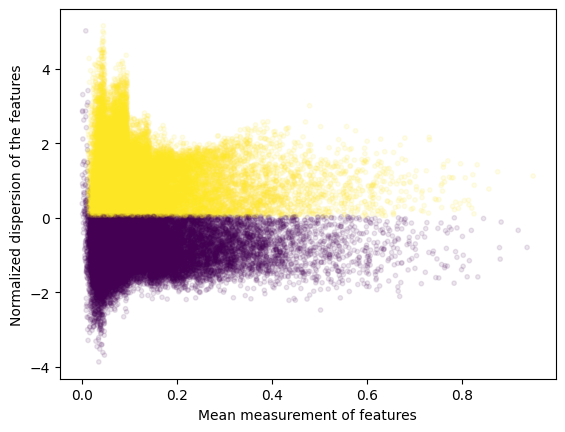

2024-12-19 13:29:14,960 cisTopic     INFO     Done!


In [47]:
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                           min_disp = 0.05,
                                           min_mean = 0.0125,
                                           max_mean = 3,
                                           max_disp = np.inf,
                                           n_bins=20,
                                           n_top_features=None,
                                           plot=True,
                                           #save= outDir + '10x_ATAC_16_20hAEL/DARs/HVR_plot.pdf'
                                                )

In [43]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
import numpy as np

In [48]:
markers_dict= find_diff_features(
    cistopic_obj,
    imputed_acc_obj,
    variable='final_embryo_annot_atlas_05112024',
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=20,
    _temp_dir='/scratch/leuven/350/vsc35050/ray_spill',
    split_pattern = '-'
)

2024-12-19 13:30:27,885	INFO worker.py:1724 -- Started a local Ray instance.


2024-12-19 13:30:29,911 cisTopic     INFO     Subsetting data for Epidermis (77676 of 607330)
2024-12-19 13:30:39,785 cisTopic     INFO     Computing p-value for Epidermis
2024-12-19 13:32:32,715 cisTopic     INFO     Computing log2FC for Epidermis
2024-12-19 13:32:34,716 cisTopic     INFO     Epidermis done!
2024-12-19 13:32:35,335 cisTopic     INFO     Subsetting data for Fat_body (37666 of 607330)
2024-12-19 13:32:40,505 cisTopic     INFO     Computing p-value for Fat_body
2024-12-19 13:34:19,145 cisTopic     INFO     Computing log2FC for Fat_body
2024-12-19 13:34:19,998 cisTopic     INFO     Fat_body done!
2024-12-19 13:34:20,612 cisTopic     INFO     Subsetting data for Glia (10394 of 607330)
2024-12-19 13:34:25,606 cisTopic     INFO     Computing p-value for Glia
2024-12-19 13:36:03,216 cisTopic     INFO     Computing log2FC for Glia
2024-12-19 13:36:03,985 cisTopic     INFO     Glia done!
2024-12-19 13:36:04,589 cisTopic     INFO     Subsetting data for Head_Ectoderm (7176 of 60

In [49]:
with open(out_dir + 'DARs/DARs_final_embryo_annot_atlas_05112024.pkl', 'wb') as f:
  pickle.dump(markers_dict, f)

In [62]:
import pickle
infile = open(out_dir + 'DARs/DARs_final_embryo_annot_atlas_05112024.pkl', 'rb')
markers_dict = pickle.load(infile)
infile.close()

In [65]:
keys_list = list(markers_dict.keys())
print(keys_list)

['Epidermis', 'Fat_body', 'Glia', 'Head_Ectoderm', 'Hemocytes', 'Hindgut', 'Malpighian_tubule', 'Midgut', 'Midgut_acidification', 'NA_lowQ', 'Neuroblasts', 'Neuronal', 'PNS_sens_neurons', 'Pharnyx', 'Primordium_all', 'Salivary_gland', 'Somatic_muscles', 'Tracheal_system', 'Visceral_muscles', 'Yolk', 'muscle_attachement_Stripe']


In [7]:
celltype = markers_dict['Somatic_muscles'].iloc[:100]
celltype[:100]

,Log2FC,Adjusted_pval,Contrast
3L:7562201-7562701,2.961850,0.0,Somatic_muscles
3L:3004106-3004606,2.863549,0.0,Somatic_muscles
3L:15942632-15943132,2.862809,0.0,Somatic_muscles
2R:20943998-20944498,2.838959,0.0,Somatic_muscles
3R:13772502-13773002,2.814913,0.0,Somatic_muscles
...,...,...,...
3R:27660068-27660568,2.532402,0.0,Somatic_muscles
3R:13425125-13425625,2.528998,0.0,Somatic_muscles
3R:15309936-15310436,2.527007,0.0,Somatic_muscles
3R:20171315-20171815,2.526363,0.0,Somatic_muscles


In [4]:
# make markers dict for annotations
import gzip
import pickle

# Define the path to the gzipped pickle file
gzip_pickle_path = out_dir + 'DARs/DARs_final_embryo_annot_atlas_05112024.pkl.gz'

# Open and load the gzipped pickle file
with gzip.open(gzip_pickle_path, 'rb') as infile:
    markers_dict = pickle.load(infile)

FileNotFoundError: [Errno 2] No such file or directory: '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/DARs_final_embryo_annot_atlas_05112024.pkl.gz'

In [5]:
import pickle
infile = open(out_dir + 'DARs/DARs_final_embryo_annot_atlas_05112024.pkl', 'rb')
markers_dict = pickle.load(infile)
infile.close()

In [6]:
print("Number of DARs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

Number of DARs found:
---------------------
  Epidermis: 4612
  Fat_body: 2697
  Glia: 2039
  Head_Ectoderm: 2493
  Hemocytes: 1873
  Hindgut: 2807
  Malpighian_tubule: 2954
  Midgut: 4931
  Midgut_acidification: 2955
  NA_lowQ: 2709
  Neuroblasts: 6629
  Neuronal: 12637
  PNS_sens_neurons: 5203
  Pharnyx: 4762
  Primordium_all: 3014
  Salivary_gland: 2312
  Somatic_muscles: 3464
  Tracheal_system: 2811
  Visceral_muscles: 3083
  Yolk: 2090
  muscle_attachement_Stripe: 4792


In [51]:
from pycisTopic.utils import region_names_to_coordinates
import os

# Define output directory
out_dir_3 = os.path.join(out_dir, 'DARs/final_embryo_annot_atlas_05112024/top_regions_max1_5Log2FC_bed')

# Ensure the output directory exists
os.makedirs(out_dir_3, exist_ok=True)

# Iterate through each cell type in the markers dictionary
for cell_type in markers_dict:
    # Filter regions with Log2FC >= 1.5
    filtered_regions = markers_dict[cell_type][markers_dict[cell_type]['Log2FC'] >= 1.5]
    
    # Convert region names to coordinates and sort them
    bed_df = region_names_to_coordinates(filtered_regions.index).sort_values(
        ["Chromosome", "Start", "End"]
    )
    
    # Write the filtered and sorted coordinates to a BED file
    bed_file_path = os.path.join(out_dir_3, f"{cell_type}.bed")
    bed_df.to_csv(
        bed_file_path,
        sep="\t",
        header=False,
        index=False
    )
    print(f"Saved {len(filtered_regions)} regions for {cell_type} to {bed_file_path}")


Saved 394 regions for Epidermis to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/final_embryo_annot_atlas_05112024/top_regions_max1_5Log2FC_bed/Epidermis.bed
Saved 691 regions for Fat_body to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/final_embryo_annot_atlas_05112024/top_regions_max1_5Log2FC_bed/Fat_body.bed
Saved 315 regions for Glia to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/final_embryo_annot_atlas_05112024/top_regions_max1_5Log2FC_bed/Glia.bed
Saved 440 regions for Head_Ectoderm to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/final_embryo_annot_atlas_05112024/top_regions_max1_5Log2FC_bed/Head_Ectoderm.bed
Saved 403 regions for Hemocytes to /lustre1/project/stg_00002/lcb/hy

In [59]:
from pycisTopic.utils import region_names_to_coordinates
import os

# Define output directory
out_dir_3 = os.path.join(out_dir, 'DARs/final_embryo_annot_atlas_05112024/all_bed')

# Ensure the output directory exists
os.makedirs(out_dir_3, exist_ok=True)

# Iterate through each cell type in the markers dictionary
for cell_type in markers_dict:
    all_regions = markers_dict[cell_type]
    
    print(f"Total regions in {cell_type}: {len(all_regions)}")
    
    # Convert region names to coordinates and sort them
    bed_df = region_names_to_coordinates(all_regions.index).sort_values(
        ["Chromosome", "Start", "End"]
    )
    print(f"Converted regions for {cell_type}: {len(bed_df)}")
    
    # Write all coordinates to a BED file
    bed_file_path = os.path.join(out_dir_3, f"{cell_type}.bed")
    bed_df.to_csv(
        bed_file_path,
        sep="\t",
        header=False,
        index=False
    )
    print(f"Saved {len(all_regions)} regions for {cell_type} to {bed_file_path}")


Total regions in Epidermis: 4612
Converted regions for Epidermis: 4612
Saved 4612 regions for Epidermis to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/final_embryo_annot_atlas_05112024/all_bed/Epidermis.bed
Total regions in Fat_body: 2697
Converted regions for Fat_body: 2697
Saved 2697 regions for Fat_body to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/final_embryo_annot_atlas_05112024/all_bed/Fat_body.bed
Total regions in Glia: 2039
Converted regions for Glia: 2039
Saved 2039 regions for Glia to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/final_embryo_annot_atlas_05112024/all_bed/Glia.bed
Total regions in Head_Ectoderm: 2493
Converted regions for Head_Ectoderm: 2493
Saved 2493 regions for Head_Ectoderm to /lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly

# pycistarget

take all DARs - for CREsted also all regions put in bw as generated with normal pseudobulk function

In [ ]:
## 10x ##

# Define the directory containing the topic .bed files
BED_DIR="/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/bed_celltype_10x/"

# Define the output directory for pycistarget
OUTPUT_DIR="/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pycistarget/10x_final_embryo_annot_atlas_05112024/"

# Loop through each Topic*chr.bed file in the BED_DIR directory
for BED_FILE in ${BED_DIR}/*.bed; do
  # Extract the base name of the file without the extension (e.g., "Mesectoderm.fragments")
  BASE_NAME=$(basename ${BED_FILE} .bed)

  # Construct the name parameter using the base name
  NAME="${BASE_NAME}"

  # Run the pycistarget command with the current bed file and dynamically constructed name
  singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch /data/leuven/software/biomed/singularity_images/images_Seppe/pycistopic_2.0a.sif pycistarget cistarget \
    --cistarget_db_fname /staging/leuven/stg_00002/lcb/icistarget/data/make_rankings/v10_clust/CTX_dm6/CTX_dm6_FCA_atac_regions_no_bg_with_mask/CTX_dm6_FCA_atac_regions_no_bg_with_mask.regions_vs_motifs.rankings.v2.feather \
    --bed_fname ${BED_FILE} \
    --output_folder ${OUTPUT_DIR} \
    --path_to_motif_annotation /user/leuven/350/vsc35050/hdickm/resources/motifs-v10nr_clust-nr.flybase-m0.001-o0.0.tbl \
    --species dm6 \
    --name ${NAME} \
    --write_html \
    --output_mode tsv
done

In [ ]:
## HyDrop ##

# Define the directory containing the topic .bed files
BED_DIR="/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/DARs/bed_celltype_HyDrop_v2/"

# Define the output directory for pycistarget
OUTPUT_DIR="/lustre1/project/stg_00002/lcb/hydrop_v2_paper/fly/cistopic_LCB_embryo_consensuspeaks/HyDrop_10x_otsu_notdownsampled/pycistarget/HyDrop_final_embryo_annot_atlas_05112024/"

# Loop through each Topic*chr.bed file in the BED_DIR directory
for BED_FILE in ${BED_DIR}/*.bed; do
  # Extract the base name of the file without the extension (e.g., "Mesectoderm.fragments")
  BASE_NAME=$(basename ${BED_FILE} .bed)

  # Construct the name parameter using the base name
  NAME="${BASE_NAME}"

  # Run the pycistarget command with the current bed file and dynamically constructed name
  singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch /data/leuven/software/biomed/singularity_images/images_Seppe/pycistopic_2.0a.sif pycistarget cistarget \
    --cistarget_db_fname /staging/leuven/stg_00002/lcb/icistarget/data/make_rankings/v10_clust/CTX_dm6/CTX_dm6_FCA_atac_regions_no_bg_with_mask/CTX_dm6_FCA_atac_regions_no_bg_with_mask.regions_vs_motifs.rankings.v2.feather \
    --bed_fname ${BED_FILE} \
    --output_folder ${OUTPUT_DIR} \
    --path_to_motif_annotation /user/leuven/350/vsc35050/hdickm/resources/motifs-v10nr_clust-nr.flybase-m0.001-o0.0.tbl \
    --species dm6 \
    --name ${NAME} \
    --write_html \
    --output_mode tsv
done